<a href="https://colab.research.google.com/github/Sindhura-tr/Machine_Learning_9_11am/blob/main/K_Means_Clustering_9_11am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means CLustering - Unsupervised Machine Learning algorithm
Clusters are formed on basis of Elucidean distance calculated between each datapoint and centroid

## Evaluation metrics are :
Cluster formation:
### Inertia:
intra cluster distance: within the cluster, the distance between datapoints should be minimal

inter cluster distance: in between the multiple clusters, the distance should be maximum

### Silhoutee score:
the datapoint maintains minimum distance within other datapoints in the cluster
and also this datapint maintains maximum distance with other datapoint of other cluster

In [1]:
%pip install yellowbrick

In [2]:
%pip install plotly nbformat

In [1]:
import pandas as pd
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
df.duplicated().sum()

np.int64(0)

## Define X features: These are the features on basis of which clustering should be performed

In [5]:
X = df.drop(columns=["CustomerID","Genre"])
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
X.columns = ["Age","Income","Spending"]

In [7]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Preprocessing and Data cleaning

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [10]:
con_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [11]:
con_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [12]:
X_pre = con_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Build the model: K- Means

In [13]:
from sklearn.cluster import KMeans

In [14]:
from yellowbrick.cluster import kelbow_visualizer

In [15]:
model = KMeans(n_clusters=5)
model.fit_predict(X_pre)

array([0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 4, 2, 2, 2, 4, 0, 2, 4, 0, 4, 4, 4, 0,
       2, 4, 0, 0, 4, 2, 4, 4, 4, 0, 2, 2, 0, 2, 4, 2, 4, 2, 0, 2, 4, 0,
       0, 2, 4, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 4, 0, 2, 0, 4, 4, 4, 4,
       4, 0, 2, 0, 0, 0, 4, 2, 2, 2, 0, 2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

## kelbow_visualizer

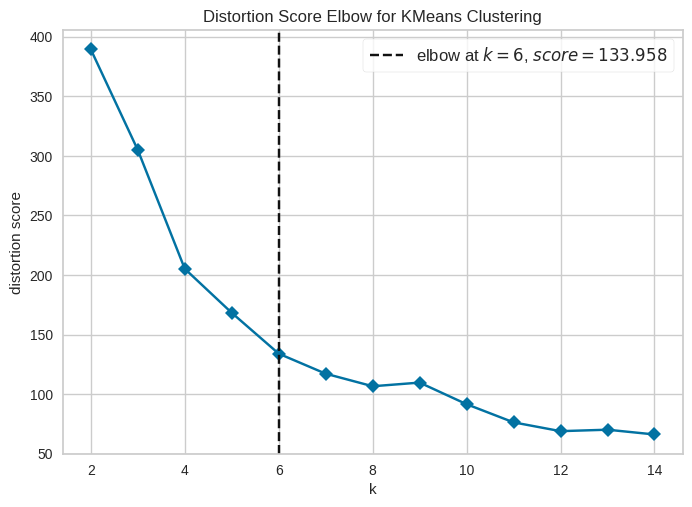

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,X_pre,k=(2,15),timings=False)
visualizer.show()

In [19]:
best_kmeans = KMeans(n_clusters=6)
clusters = best_kmeans.fit_predict(X_pre)
clusters

array([5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 4, 5,
       4, 5, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [20]:
# Centroids of each cluster
best_kmeans.cluster_centers_

array([[ 0.36959845,  1.12879725, -1.25264236],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 1.25472096, -0.24021294, -0.04399777],
       [-0.90119708, -0.05954431, -0.20850019],
       [ 0.47895722, -1.30822992, -1.19644353],
       [-0.97602698, -1.32549704,  1.0371827 ]])

In [21]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [22]:
X["Clusters"] = clusters
X.head()

,Age,Income,Spending,Clusters
0,19,15,39,5
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4


In [23]:
for i in range(6):
  print(f"Details of cluster {i}")
  display(X[X["Clusters"]==i])
  print("------------------------")

Details of cluster 0


,Age,Income,Spending,Clusters
126,43,71,35,0
128,59,71,11,0
130,47,71,9,0
136,44,73,7,0
140,57,75,5,0
146,48,77,36,0
148,34,78,22,0
150,43,78,17,0
152,44,78,20,0
154,47,78,16,0


------------------------
Details of cluster 1


,Age,Income,Spending,Clusters
123,39,69,91,1
125,31,70,77,1
127,40,71,95,1
129,38,71,75,1
131,39,71,75,1
133,31,72,71,1
135,29,73,88,1
137,32,73,73,1
139,35,74,72,1
141,32,75,93,1


------------------------
Details of cluster 2


,Age,Income,Spending,Clusters
40,65,38,35,2
46,50,40,55,2
50,49,42,52,2
53,59,43,60,2
54,50,43,45,2
55,47,43,41,2
56,51,44,50,2
57,69,44,46,2
59,53,46,46,2
60,70,46,56,2


------------------------
Details of cluster 3


,Age,Income,Spending,Clusters
47,27,40,47,3
48,29,40,42,3
49,31,40,42,3
51,33,42,60,3
52,31,43,54,3
58,27,46,51,3
61,19,46,55,3
65,18,48,59,3
68,19,48,59,3
69,32,48,47,3


------------------------
Details of cluster 4


,Age,Income,Spending,Clusters
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4


------------------------
Details of cluster 5


,Age,Income,Spending,Clusters
0,19,15,39,5
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5


------------------------


## Metrics:
Inertia

In [24]:
best_kmeans.inertia_

134.30081710984643

## Plot the clusters for this model

In [25]:
import plotly.express as px

In [26]:
fig = px.scatter_3d(data_frame=X,x="Age",y="Income",z="Spending",color="Clusters")
fig.show()